<a href="https://colab.research.google.com/github/Robinkim0125/DataAnalysis/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import requests # requests라는 패키지를 임포트
import pandas as pd # pandas라는 패키지를 임포트하는데 앞으로 pd로 부르겠음
from bs4 import BeautifulSoup # bs4라는 패키지로부터 BeautifulSoup라는 모듈을 임포트

# 네이버의 크롤링 방지 장치를 우회하기 위함
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36'}

movie_code = 191559 # 211097까지 존재, 191559는 앞서 봤던 영화 '듄'의 코드
movies = requests.get('https://movie.naver.com/movie/bi/mi/basic.naver?code='+str(movie_code), headers=headers)

# html 분석
soup = BeautifulSoup(movies.content, 'html.parser')

In [2]:
movie_title = soup.select('#content > div.article > div.mv_info_area > div.mv_info > h3 > a')
movie_genre = soup.select('#content > div.article > div.mv_info_area > div.mv_info > dl > dd:nth-of-type(1) > p > span:nth-of-type(1) > a')
movie_content = soup.select('#content > div.article > div.section_group.section_group_frst > div:nth-of-type(1) > div > div > p')
print(movie_title,movie_genre,movie_content)

[<a href="./basic.naver?code=191559">듄</a>] [<a href="/movie/sdb/browsing/bmovie.naver?genre=6">모험</a>, <a href="/movie/sdb/browsing/bmovie.naver?genre=1">드라마</a>, <a href="/movie/sdb/browsing/bmovie.naver?genre=18">SF</a>] [<p class="con_tx">10191년, 아트레이데스 가문의 후계자인 폴(티모시 샬라메)은 시공을 초월한 존재이자<br/> 전 우주를 구원할 예지된 자의 운명을 타고났다.<br/> 그리고 어떤 계시처럼 매일 꿈에서 아라키스 행성에 있는 한 여인을 만난다.<br/> 모래언덕을 뜻하는 '듄'이라 불리는 아라키스는 물 한 방울 없는 사막이지만<br/> 우주에서 가장 비싼 물질인 신성한 환각제 스파이스의 유일한 생산지로 이를 차지하기 위한 전쟁이 치열하다.<br/> 황제의 명령으로 폴과 아트레이데스 가문은 죽음이 기다리는 아라키스로 향하는데…<br/> <br/> 위대한 자는 부름에 응답한다, 두려움에 맞서라, 이것은 위대한 시작이다!</p>]


In [3]:
movie_title=movie_title[0].text
print(movie_title)

듄


In [4]:
movie_genre_list=[]
for genre in movie_genre:
  movie_genre_list.append(genre.text)

print(movie_genre_list)

['모험', '드라마', 'SF']


In [5]:
movie_content = movie_content[0].text
print(movie_content)

10191년, 아트레이데스 가문의 후계자인 폴(티모시 샬라메)은 시공을 초월한 존재이자 전 우주를 구원할 예지된 자의 운명을 타고났다. 그리고 어떤 계시처럼 매일 꿈에서 아라키스 행성에 있는 한 여인을 만난다. 모래언덕을 뜻하는 '듄'이라 불리는 아라키스는 물 한 방울 없는 사막이지만 우주에서 가장 비싼 물질인 신성한 환각제 스파이스의 유일한 생산지로 이를 차지하기 위한 전쟁이 치열하다. 황제의 명령으로 폴과 아트레이데스 가문은 죽음이 기다리는 아라키스로 향하는데…  위대한 자는 부름에 응답한다, 두려움에 맞서라, 이것은 위대한 시작이다!


In [6]:
def crawl(code):
    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36'}

    movie_code = code # 211097까지 존재
    movies = requests.get('https://movie.naver.com/movie/bi/mi/basic.naver?code='+str(movie_code), headers=headers)

    soup = BeautifulSoup(movies.content, 'html.parser')
    movie_title = soup.select('#content > div.article > div.mv_info_area > div.mv_info > h3 > a:nth-of-type(1)')
    movie_genre = soup.select('#content > div.article > div.mv_info_area > div.mv_info > dl > dd:nth-of-type(1) > p > span:nth-of-type(1) > a')
    movie_content = soup.select('#content > div.article > div.section_group.section_group_frst > div:nth-of-type(1) > div > div > p')

    movie_title = movie_title[0].text
    movie_genre_list = []
    for genre in movie_genre:
      movie_genre_list.append(genre.text)
    movie_content = movie_content[0].text

    movie_list = [movie_title, movie_genre_list, movie_content]

    return movie_list # 크롤링한 내용을 다른 변수에 저장할 수 있도록 리턴!

In [7]:
movie_list = crawl(191559)
print(movie_list)

['듄', ['모험', '드라마', 'SF'], "10191년, 아트레이데스 가문의 후계자인 폴(티모시 샬라메)은 시공을 초월한 존재이자\xa0전 우주를 구원할 예지된 자의 운명을 타고났다.\xa0그리고 어떤 계시처럼 매일 꿈에서 아라키스 행성에 있는 한 여인을 만난다.\xa0모래언덕을 뜻하는 '듄'이라 불리는 아라키스는 물 한 방울 없는 사막이지만\xa0우주에서 가장 비싼 물질인 신성한 환각제 스파이스의 유일한 생산지로 이를 차지하기 위한 전쟁이 치열하다.\xa0황제의 명령으로 폴과 아트레이데스 가문은 죽음이 기다리는 아라키스로 향하는데…\xa0\xa0위대한 자는 부름에 응답한다, 두려움에 맞서라, 이것은 위대한 시작이다!"]


In [8]:
def crawl_all():
    movie_list_all = [] # 전체 영화 내용을 저장하기 위한 리스트
    for i in range(10000, 20001): # 영화 코드 10000 부터 영화 코드 20000 까지 크롤링!
        try: # 혹시나 크롤링이 안되더라도 다음 영화 코드로 계속 진행하라는 의미의 try ~ except
            movie_list = crawl(i)
            movie_list_all.append(movie_list) # 크롤링해온 내용을 리스트에 저장
        except:
            continue

    return movie_list_all # 전체 영화 내용이 담긴 리스트를 리턴

In [9]:
movie_list_all = crawl_all()
#데이터 프레임으로 저장
df = pd.DataFrame(movie_list_all, columns=['Title','Genre','Content'])
print(df)

df.to_csv('naver_movie.csv')

                     Title               Genre  \
0                   시네마 천국       [드라마, 멜로/로맨스]   
1                 빽 투 더 퓨쳐           [SF, 코미디]   
2               빽 투 더 퓨쳐 2           [SF, 코미디]   
3               빽 투 더 퓨쳐 3  [SF, 서부, 판타지, 코미디]   
4     스타워즈 에피소드 4 - 새로운 희망   [SF, 모험, 액션, 판타지]   
...                    ...                 ...   
8062                   껄떡쇠               [드라마]   
8063               꼬마 암행어사                [한국]   
8064                 꼬마 검객                [한국]   
8065            꼬마 사장과 여비서                [한국]   
8066                 꼬마 신랑                [한국]   

                                                Content  
0     어린 시절 영화가 세상의 전부였던 소년 토토는 학교 수업을 마치면 마을 광장에 있는...  
1     힐 밸리(Hill Valley)에 사는 주인공 마티 맥플라이(Marty McFly:...  
2     브라운 박사(Dr. Emmett 'Doc' L. Brown: 코리스토퍼 로이드 분)...  
3     1955년에 남겨진 마티는 박사가 1885년으로 갔음을 알게 된다. 그의 흔적을 찾...  
4     {아주 먼 옛날 은하계 저편에...(A long time ago in a galax...  
...                                                

In [18]:
import pandas as pd
movies= pd.read_table('naver_movie.csv',sep=',') #,로 열 구분
movies.dropna(inplace=True)
 #inplace True 를 해주면 따로 변수 저장 안해도 원 데이터프레임에 저장
content_list = movies['Content'].values
joined_data = ' '.join(content_list)
print(joined_data[:10])

어린 시절 영화가 


불용어 제거 전 워드 클라우드

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


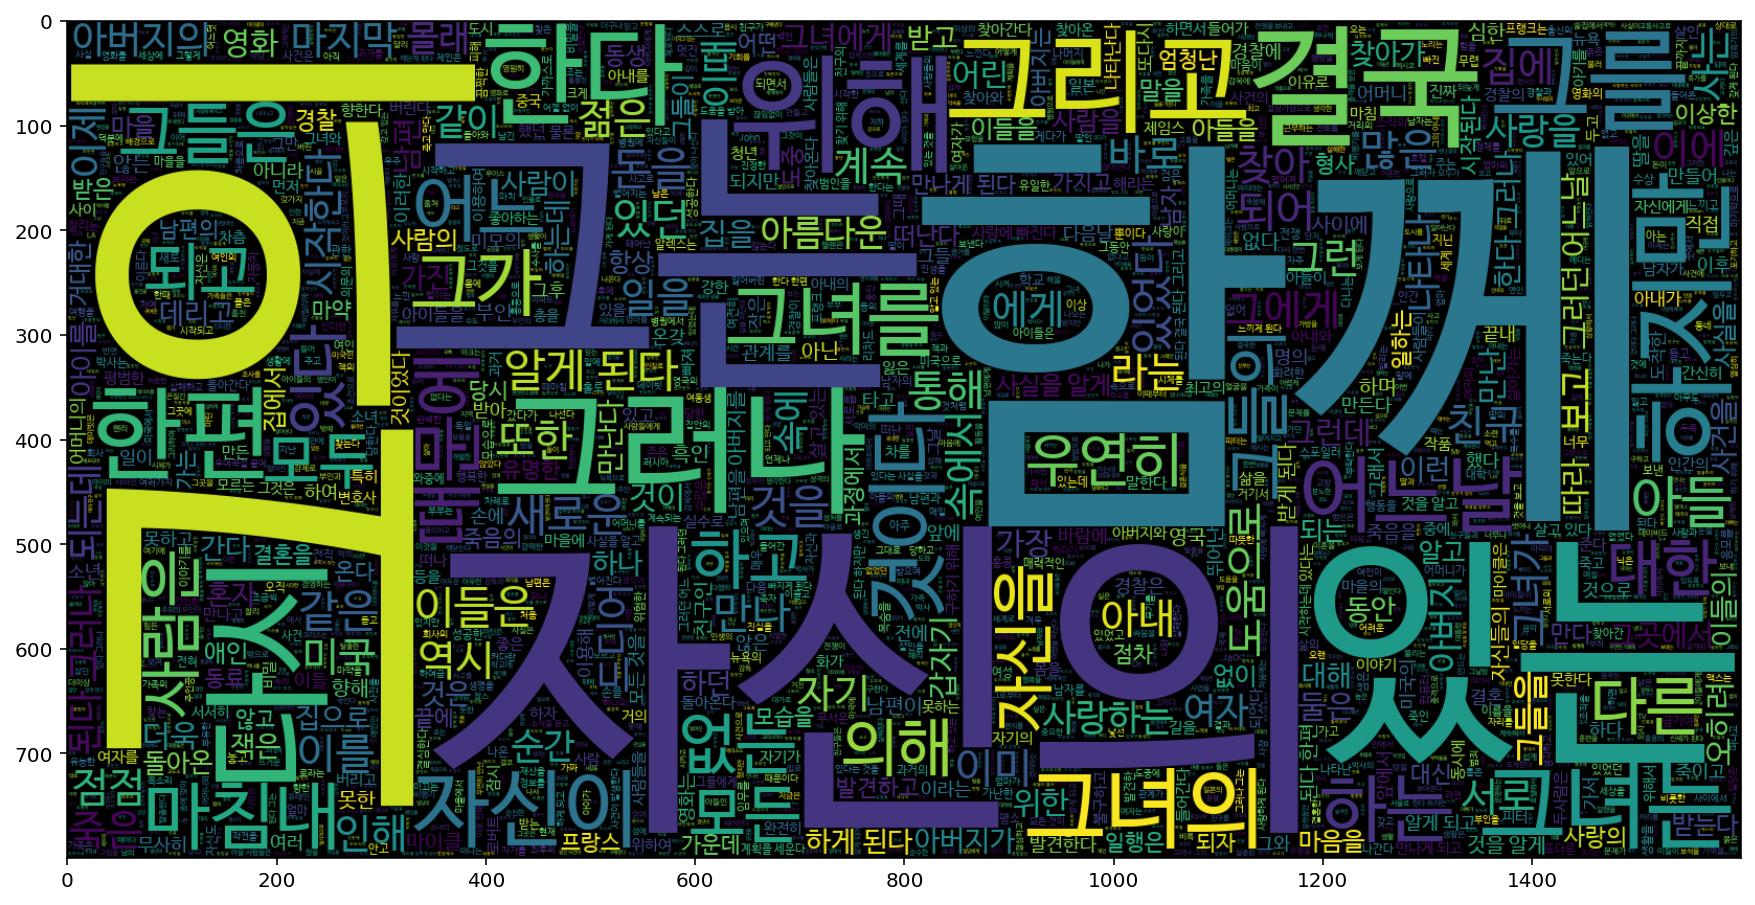

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt # 한글폰트 세팅할 때 불러왔었던 패키지!

# 영화 줄거리의 워드클라우드
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 10000 , width = 1600 , height = 800, font_path = fontpath).generate(joined_data)
plt.imshow(wc, interpolation = 'bilinear')

In [23]:
!pip install konlpy # konlpy 패키지 설치
from konlpy.tag import Okt # Okt 모듈 불러오기

tokenizer = Okt() # tokenizer 라는 이름으로 Okt 모듈 사용!

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 651 kB/s 
     |████████████████████████████████| 453 kB 51.7 MB/s 


In [24]:
stop_words = ['함께', '자신', '그', '그리고', '그들', '그녀', '다시', '위해', '아버지', '사람', '때문'] # 나만의 불용어 정의
movies['Content'] = movies['Content'].apply(tokenizer.nouns) # 토큰화 진행 (명사 단위로 나누어 놓아야 불용어인지 아닌지 판별이 가능)
movies['Content'] = movies['Content'].apply(lambda x: [item for item in x if item not in stop_words and len(item) > 1]) # 불용어 제거

In [27]:
print(movies['Content'])

0       [시절, 영화, 세상, 전부, 소년, 토토, 학교, 수업, 마치, 마을, 광장, 시...
1       [밸리, 주인공, 마티, 맥플라이, 마이클, 폭스, 록큰롤, 스케이트보드, 자동차,...
2       [브라운, 박사, 코리, 스토퍼, 이드, 후의, 미래, 마티, 마이클, 폭스, 제니...
3       [마티, 박사, 흔적, 리안, 폐광, 비프, 토마스, 윌슨, 선조, 매드, 태넌, ...
4       [아주, 옛날, 은하계, 저편, 내란, 시대, 반란, 우주선, 비밀, 기지, 공격,...
                              ...                        
8220    [천하, 잡놈, 껄떡, 부임, 윤사, 괴한, 로부터, 구출, 사또, 대가, 호위, ...
8221    [영의정, 윤대감, 아들, 나이, 살이, 신동, 소문, 무술, 솜씨, 또한, 일품,...
8222    [임진왜란, 직후, 동래부, 박성, 정국, 혼란, 왜적, 야합, 정적, 이원국, 유...
8223    [꼬마, 엄마, 투정, 사장, 혜련, 수행, 비서, 여러가지, 처리, 이의, 남편,...
8224    [꽃봉, 판서, 외아들, 꼬마, 신랑, 시집, 간다, 판서, 소생, 이자, 만득이,...
Name: Content, Length: 8067, dtype: object


In [30]:
import numpy as np
content_list = np.hstack(movies['Content'].values)
print(content_list)
joined_data= ' '.join(content_list)

['시절' '영화' '세상' ... '꽃봉' '색시' '간다']


불용어 제거 후 워드 클라우드

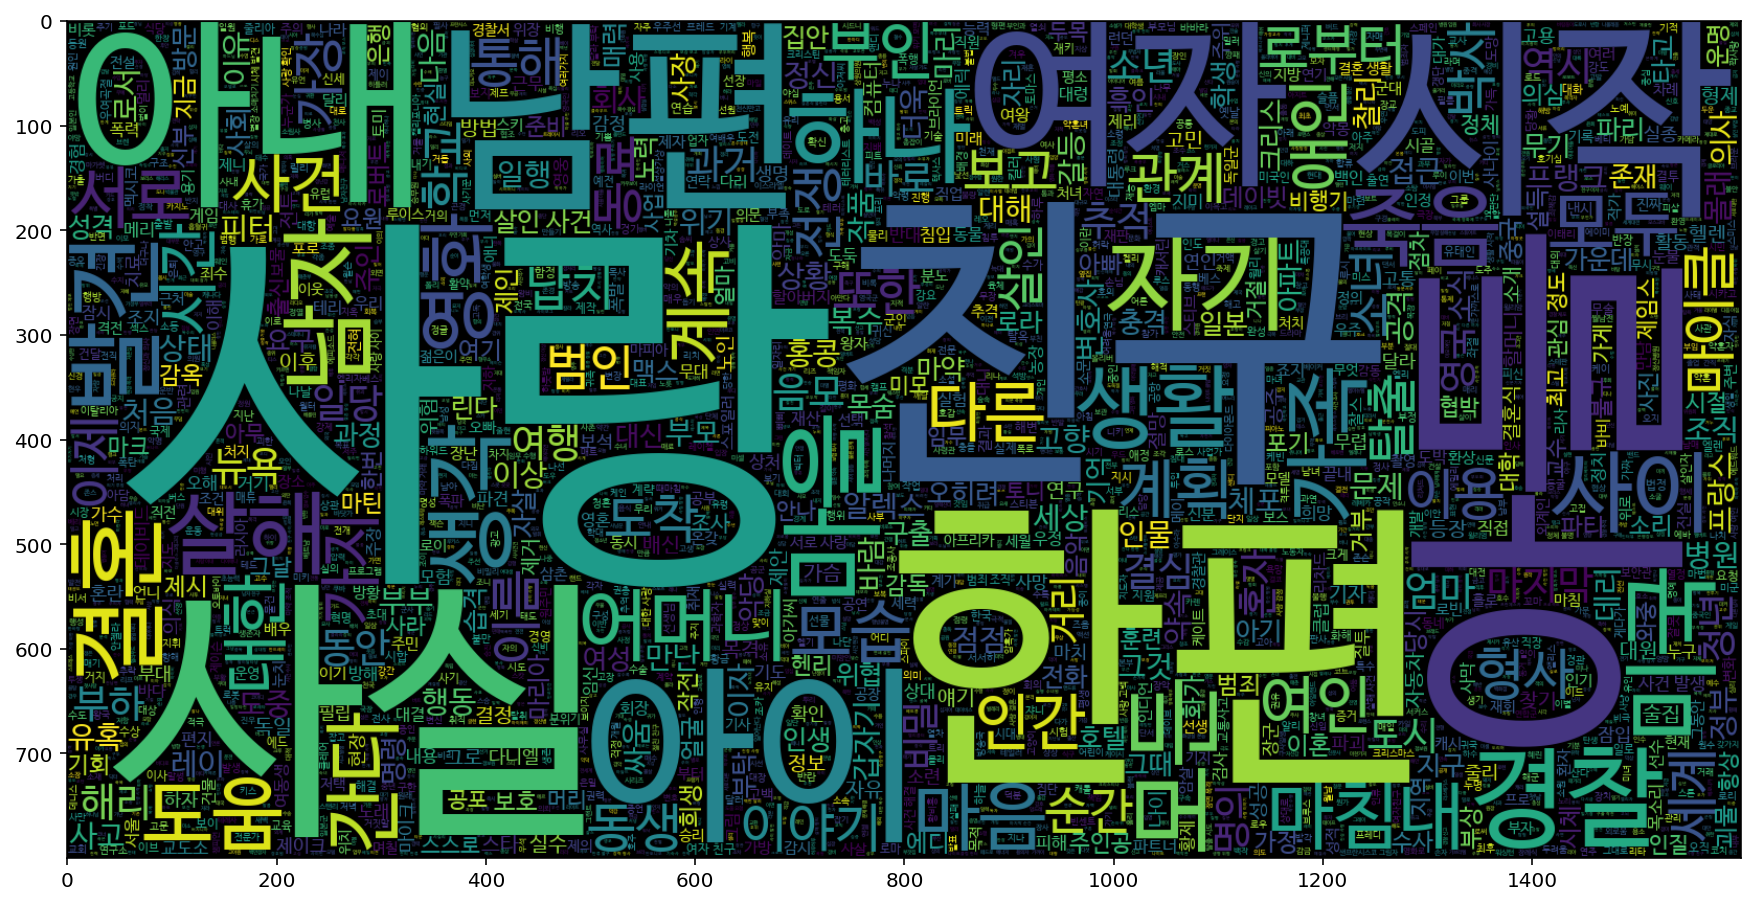

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt # 한글폰트 세팅할 때 불러왔었던 패키지!

# 영화 줄거리의 워드클라우드
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 10000 , width = 1600 , height = 800, font_path = fontpath).generate(joined_data)
plt.imshow(wc, interpolation = 'bilinear')